In [1]:
# import das bibliotecas usadas no projeto

import numpy as np
import seaborn as sns
from math import sqrt

In [2]:
def lanca_dados() -> int:
    '''
    Função para simular o lançamento de dois dados e retornar a soma das duas faces
    
    Parametros: Nenhum
    
    Retorno: inteiro com a soma dos resultados dos dados'''
    
    dados = np.random.randint(1, 7, size = (1, 2)) # vetor simulando o lançamento dos dois dados

    soma_faces = np.sum(dados)

    return soma_faces

#armazenando os resultados de 1000 lancamentos num vetor
arr_resultados = np.array([lanca_dados() for i in range(1000)])


In [3]:
# Calculando os resultados

media = round(np.mean(arr_resultados), 2)

maximo = np.max(arr_resultados)

minimo = np.min(arr_resultados)

dvp = np.std(arr_resultados)

print(f'''
A média dos resultados é: {media}
\nO lançamento máximo foi: {maximo}
\nO lançamento minimo foi {minimo}''')

print('\n\nA frequencia de cada resultado é:\n')

# contagem das frequencias de cada resultado

for resultado in range(2, 13):
    freq = np.count_nonzero(arr_resultados == resultado) # conta a ocorrencia de cada possível resultado
    
    print(f'Soma igual à {resultado:2d}: {freq} --> {round(freq/len(arr_resultados) * 100, 2)}% do total de jogos')


A média dos resultados é: 7.04

O lançamento máximo foi: 12

O lançamento minimo foi 2


A frequencia de cada resultado é:

Soma igual à  2: 23 --> 2.3% do total de jogos
Soma igual à  3: 62 --> 6.2% do total de jogos
Soma igual à  4: 83 --> 8.3% do total de jogos
Soma igual à  5: 91 --> 9.1% do total de jogos
Soma igual à  6: 148 --> 14.8% do total de jogos
Soma igual à  7: 157 --> 15.7% do total de jogos
Soma igual à  8: 154 --> 15.4% do total de jogos
Soma igual à  9: 122 --> 12.2% do total de jogos
Soma igual à 10: 87 --> 8.7% do total de jogos
Soma igual à 11: 47 --> 4.7% do total de jogos
Soma igual à 12: 26 --> 2.6% do total de jogos


In [4]:
# normalizando a distribuicao
desvio = (arr_resultados - media) / dvp

C:\Users\vinic\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


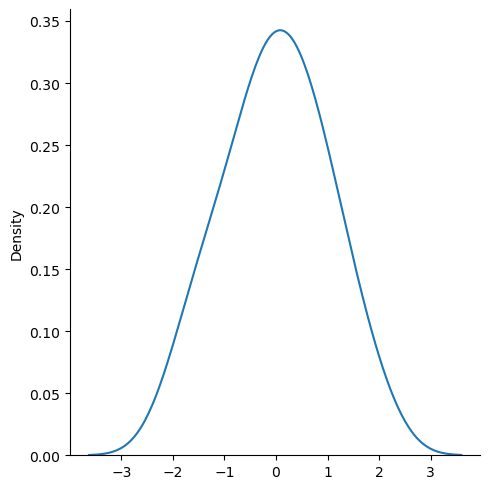

In [5]:
# plotando a distribuicao normalizada do conjunto de dados
distribuicao = sns.displot(desvio, kind="kde", bw_adjust=2)

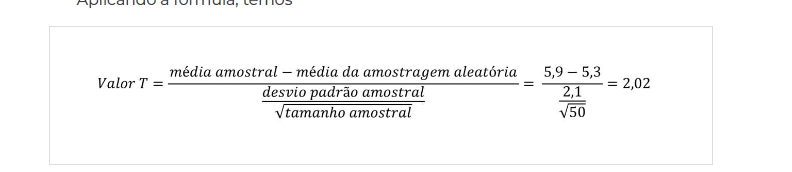

referencia: https://www.zup.com.br/blog/teste-t-de-student

In [41]:
# teste de hipotese

#Hipotese nula H0: Distribuicao é normal com média u = 7.04
# Hipotese alternativa: H1: Distribuicao u <> 7.04

# Adotando um intervalo de confianca de 95%, o tamanho da amostra pode ser de 278 e a qtd de desvios padrao é z = +-1,96

#np.random.seed(42) # semente para replicabilidade da minha amostra

arr_amostra = np.random.choice(arr_resultados, size=278) # vetor de amostras aleatorios para fazermos o teste de hipotese

tam_amostra = len(arr_amostra)

media_amostral = np.mean(arr_amostra)

dvp_amostral = np.std(arr_amostra)

t_valor = round((media_amostral - media) / (dvp_amostral / sqrt(tam_amostra)), 2)

if -1.96 <= t_valor <= 1.96:
    print(
        f'''
        Para o jogo de dados ser justo, a soma das faces deveriam ter a mesma probabilidade de ocorrer.
        Porém, sabemos que na prática isto é impossível. O valor do parametro t é {t_valor}. Como esse valor
        fica dentro do intervalo +- 1,96, podemos dizer que a simulação dos 1000 lançamentos reflete o jogo como ele 
        realmente é,independente de ser justo.''')

else:
    print(f'Valor t é {t_valor}, que fica fora do intervalo +- 1,96 e portanto a simulacao não reflete a realidade do jogo')


        Para o jogo de dados ser justo, a soma das faces deveriam ter a mesma probabilidade de ocorrer.
        Porém, sabemos que na prática isto é impossível. O valor do parametro t é 1.71. Como esse valor
        fica dentro do intervalo +- 1,96, podemos dizer que a simulação dos 1000 lançamentos reflete o jogo como ele 
        realmente é,independente de ser justo.
